# Data Preparation for Group 1: SP & NQ Futures (1-Minute Data)

This notebook covers the data preparation steps for high-frequency trading strategies on 1-minute NYSE session futures data (SP & NQ). Each step is documented and implemented for reproducibility.

## 1. Import Required Libraries

We will use pandas, numpy, pyarrow, and other libraries for data loading and preprocessing.

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import os
from glob import glob
from datetime import datetime, time, timedelta

## 2. Load 1-Minute Futures Data

Load the 1-minute data for SP and NQ from the Group 1 Parquet files in the `data` folder. These files are named `data1_*.parquet` and are divided by quarter. All files will be concatenated for analysis.

In [19]:
# Load 1-Minute Futures Data from Parquet files for Group 1 (SP & NQ)
# Read all data1_*.parquet files from the data folder and concatenate them
import glob

data_folder = 'data'
parquet_files = sorted(glob.glob(f'{data_folder}/data1_*.parquet'))

# Read and concatenate all quarters
df_list = [pd.read_parquet(f) for f in parquet_files]
df = pd.concat(df_list, ignore_index=True)

# Ensure datetime column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Add year_quarter column
def get_year_quarter(dt):
    return f"{dt.year}Q{((dt.month-1)//3)+1}"
df['year_quarter'] = df['datetime'].apply(get_year_quarter)

# Add date and time columns
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

df = df.set_index('datetime')

df.info()
# Display the first few rows of the dataframe
print(df.head(20))
# Display the last few rows of the dataframe
print(df.tail(10))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175812 entries, 2023-01-02 09:31:00+00:00 to 2025-06-30 16:00:00+00:00
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   NQ            175423 non-null  float64
 1   SP            175423 non-null  float64
 2   year_quarter  175812 non-null  object 
 3   date          175812 non-null  object 
 4   time          175812 non-null  object 
dtypes: float64(2), object(3)
memory usage: 8.0+ MB
                           NQ  SP year_quarter        date      time
datetime                                                            
2023-01-02 09:31:00+00:00 NaN NaN       2023Q1  2023-01-02  09:31:00
2023-01-02 09:32:00+00:00 NaN NaN       2023Q1  2023-01-02  09:32:00
2023-01-02 09:33:00+00:00 NaN NaN       2023Q1  2023-01-02  09:33:00
2023-01-02 09:34:00+00:00 NaN NaN       2023Q1  2023-01-02  09:34:00
2023-01-02 09:35:00+00:00 NaN NaN       2023Q1  2023-01-02  09:35:00
2

In [20]:
# Handle missing values (forward fill, then drop any remaining)
def handle_missing(df):
    df = df.sort_values(['date', 'time'])
    df = df.ffill().bfill()
    df = df.dropna()
    return df

df = handle_missing(df)
df.isnull().sum()


NQ              0
SP              0
year_quarter    0
date            0
time            0
dtype: int64

In [21]:
df = df.rename(columns={'NQ': 'close_NQ', 'SP': 'close_SP'})
df.head(20)


,close_NQ,close_SP,year_quarter,date,time
datetime,,,,,
2023-01-02 09:31:00+00:00,11015.499,3855.125,2023Q1,2023-01-02,09:31:00
2023-01-02 09:32:00+00:00,11015.499,3855.125,2023Q1,2023-01-02,09:32:00
2023-01-02 09:33:00+00:00,11015.499,3855.125,2023Q1,2023-01-02,09:33:00
2023-01-02 09:34:00+00:00,11015.499,3855.125,2023Q1,2023-01-02,09:34:00
2023-01-02 09:35:00+00:00,11015.499,3855.125,2023Q1,2023-01-02,09:35:00
2023-01-02 09:36:00+00:00,11015.499,3855.125,2023Q1,2023-01-02,09:36:00
2023-01-02 09:37:00+00:00,11015.499,3855.125,2023Q1,2023-01-02,09:37:00
2023-01-02 09:38:00+00:00,11015.499,3855.125,2023Q1,2023-01-02,09:38:00
2023-01-02 09:39:00+00:00,11015.499,3855.125,2023Q1,2023-01-02,09:39:00


In [25]:
# Let's create an object containing only closing prices
# (columns starting with "close_")

data_close = df.filter(like = "close_")
# Calculate logarithmic returns in basis points (bps) for closing prices NQ and SP  in data_close
# 1 bps = 0.01% = 0.0001, so multiply log returns by 10,000

returns = np.log(data_close/ data_close.shift(1)) * 10000

# changing the column names to make them appropriate
# (replace close_ with r_ )

returns.columns = [col.replace("close_", "r_") for col in returns.columns]

returns.head()

,r_NQ,r_SP
datetime,,
2023-01-02 09:31:00+00:00,NaN,NaN
2023-01-02 09:32:00+00:00,0.0,0.0
2023-01-02 09:33:00+00:00,0.0,0.0
2023-01-02 09:34:00+00:00,0.0,0.0
2023-01-02 09:35:00+00:00,0.0,0.0


In [32]:
# Create an object with selected columns: closing prices and rates of return for NQ and SP
data_NQ_SP = pd.concat(
    [df, returns[['r_NQ', 'r_SP']]],
    axis=1
)

data_NQ_SP.tail(10)


,close_NQ,close_SP,year_quarter,date,time,r_NQ,r_SP
datetime,,,,,,,
2025-06-30 15:51:00+00:00,22691.186,6210.103,2025Q2,2025-06-30,15:51:00,5.431336,7.464820
2025-06-30 15:52:00+00:00,22695.265,6210.909,2025Q2,2025-06-30,15:52:00,1.797453,1.297801
2025-06-30 15:53:00+00:00,22694.064,6210.861,2025Q2,2025-06-30,15:53:00,-0.529199,-0.077284
2025-06-30 15:54:00+00:00,22706.554,6213.088,2025Q2,2025-06-30,15:54:00,5.502128,3.585012
2025-06-30 15:55:00+00:00,22714.587,6212.869,2025Q2,2025-06-30,15:55:00,3.537119,-0.352488
2025-06-30 15:56:00+00:00,22699.298,6208.279,2025Q2,2025-06-30,15:56:00,-6.733183,-7.390622
2025-06-30 15:57:00+00:00,22689.619,6206.774,2025Q2,2025-06-30,15:57:00,-4.264918,-2.424476
2025-06-30 15:58:00+00:00,22706.510,6211.059,2025Q2,2025-06-30,15:58:00,7.441604,6.901365
2025-06-30 15:59:00+00:00,22697.721,6208.543,2025Q2,2025-06-30,15:59:00,-3.871445,-4.051660


## 3. Session Filtering (NYSE 9:30–16:00 CET)

Filter the data to include only rows between 9:30 and 16:00 CET for each trading day.

In [34]:
# Filter for NYSE session: 9:30–16:00 CET
# Assuming 'datetime' is timezone-aware or already in CET

def session_filter(df):
    session_start = time(9, 30)
    session_end = time(16, 0)
    return df[(df['time'] >= session_start) & (df['time'] <= session_end)]

data_NQ_SP = session_filter(data_NQ_SP)
data_NQ_SP.head()

,close_NQ,close_SP,year_quarter,date,time,r_NQ,r_SP
datetime,,,,,,,
2023-01-02 09:31:00+00:00,11015.499,3855.125,2023Q1,2023-01-02,09:31:00,NaN,NaN
2023-01-02 09:32:00+00:00,11015.499,3855.125,2023Q1,2023-01-02,09:32:00,0.0,0.0
2023-01-02 09:33:00+00:00,11015.499,3855.125,2023Q1,2023-01-02,09:33:00,0.0,0.0
2023-01-02 09:34:00+00:00,11015.499,3855.125,2023Q1,2023-01-02,09:34:00,0.0,0.0
2023-01-02 09:35:00+00:00,11015.499,3855.125,2023Q1,2023-01-02,09:35:00,0.0,0.0


## 4. Exclude First/Last 10 Minutes

Remove the first and last 10 minutes of each session from calculations, as required by the assignment.

In [36]:
# Mark first and last 10 minutes of each session as missing (do not use in calculations)
def mask_first_last_10min(df, columns_to_mask=None):
    if columns_to_mask is None:
        # Mask all columns except datetime, date, and time
        columns_to_mask = [col for col in df.columns if col not in ['datetime', 'date', 'time']]
    session_first_10 = df['time'].between(time(9, 31), time(9, 40))
    session_last_10 = df['time'].between(time(15, 51), time(16, 0))
    mask = session_first_10 | session_last_10
    df.loc[mask, columns_to_mask] = np.nan
    return df

# Example: mask all columns except datetime, date, and time
data_NQ_SP = mask_first_last_10min(data_NQ_SP)
data_NQ_SP.head(20)

,close_NQ,close_SP,year_quarter,date,time,r_NQ,r_SP
datetime,,,,,,,
2023-01-02 09:31:00+00:00,NaN,NaN,NaN,2023-01-02,09:31:00,NaN,NaN
2023-01-02 09:32:00+00:00,NaN,NaN,NaN,2023-01-02,09:32:00,NaN,NaN
2023-01-02 09:33:00+00:00,NaN,NaN,NaN,2023-01-02,09:33:00,NaN,NaN
2023-01-02 09:34:00+00:00,NaN,NaN,NaN,2023-01-02,09:34:00,NaN,NaN
2023-01-02 09:35:00+00:00,NaN,NaN,NaN,2023-01-02,09:35:00,NaN,NaN
2023-01-02 09:36:00+00:00,NaN,NaN,NaN,2023-01-02,09:36:00,NaN,NaN
2023-01-02 09:37:00+00:00,NaN,NaN,NaN,2023-01-02,09:37:00,NaN,NaN
2023-01-02 09:38:00+00:00,NaN,NaN,NaN,2023-01-02,09:38:00,NaN,NaN
2023-01-02 09:39:00+00:00,NaN,NaN,NaN,2023-01-02,09:39:00,NaN,NaN


## 5. No-Trading and Signal Calculation Windows

Mark the no-trading window (9:31–9:55) and the signal calculation window (9:41–9:55). Ensure no trades are entered in the first 25 minutes, but signals can be calculated from 9:41.

In [38]:
# Mark no-trading and signal calculation windows
def mark_windows(df):
    no_trade_start = time(9, 31)
    no_trade_end = time(9, 55)
    signal_start = time(9, 41)
    signal_end = time(9, 55)
    
    df['no_trade'] = df['time'].between(no_trade_start, no_trade_end)
    df['signal_window'] = df['time'].between(signal_start, signal_end)
    return df

data_NQ_SP = mark_windows(data_NQ_SP)
data_NQ_SP[['time', 'no_trade', 'signal_window']].head(20)

,time,no_trade,signal_window
datetime,,,
2023-01-02 09:31:00+00:00,09:31:00,True,False
2023-01-02 09:32:00+00:00,09:32:00,True,False
2023-01-02 09:33:00+00:00,09:33:00,True,False
2023-01-02 09:34:00+00:00,09:34:00,True,False
2023-01-02 09:35:00+00:00,09:35:00,True,False
2023-01-02 09:36:00+00:00,09:36:00,True,False
2023-01-02 09:37:00+00:00,09:37:00,True,False
2023-01-02 09:38:00+00:00,09:38:00,True,False
2023-01-02 09:39:00+00:00,09:39:00,True,False


## 6.  Plot NQ and SP Futures Prices

Visualize the time series for both NQ and SP futures, using time as the x-axis and creating subplots for each instrument. NQ and SP are columns in the dataframe.

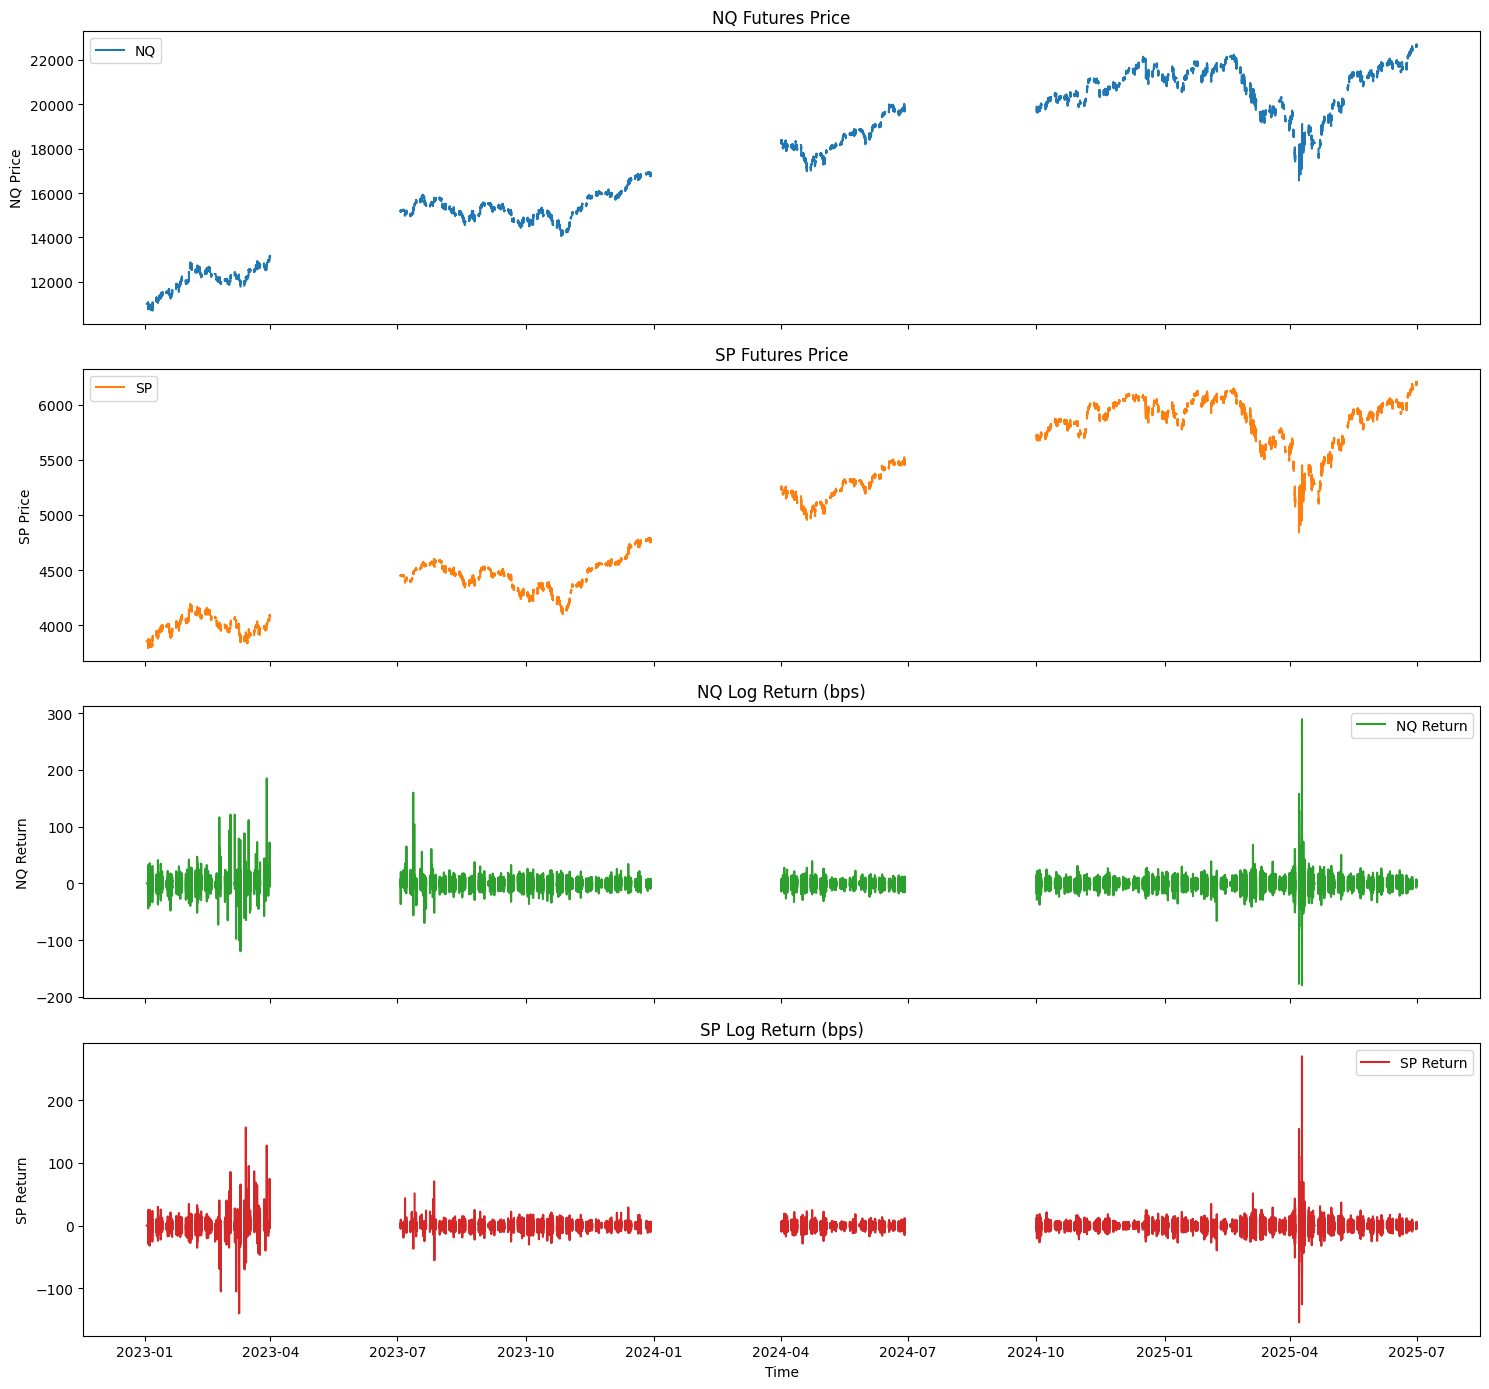

In [39]:
# Plot NQ and SP futures prices and their returns as subplots
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 1, figsize=(15, 14), sharex=True)

# Price plots
axs[0].plot(data_NQ_SP.index, data_NQ_SP['close_NQ'], label='NQ', color='tab:blue')
axs[0].set_title('NQ Futures Price')
axs[0].set_ylabel('NQ Price')
axs[0].legend()

axs[1].plot(data_NQ_SP.index, data_NQ_SP['close_SP'], label='SP', color='tab:orange')
axs[1].set_title('SP Futures Price')
axs[1].set_ylabel('SP Price')
axs[1].legend()

# Returns plots
axs[2].plot(data_NQ_SP.index, data_NQ_SP['r_NQ'], label='NQ Return', color='tab:green')
axs[2].set_title('NQ Log Return (bps)')
axs[2].set_ylabel('NQ Return')
axs[2].legend()

axs[3].plot(data_NQ_SP.index, data_NQ_SP['r_SP'], label='SP Return', color='tab:red')
axs[3].set_title('SP Log Return (bps)')
axs[3].set_ylabel('SP Return')
axs[3].set_xlabel('Time')
axs[3].legend()

plt.tight_layout()
plt.show()

## 7. Save/Preview Cleaned Data

Save the cleaned and filtered data for further analysis, and displaying a preview to verify correctness.

In [ ]:
# Save cleaned data for further analysis
cleaned_path = 'data/cleaned_summary_data1_all_quarters.csv'
data_NQ_SP.to_csv(cleaned_path, index=True)

# Save cleaned data as Parquet file as well
cleaned_parquet_path = 'data/cleaned_summary_data1_all_quarters.parquet'
data_NQ_SP.to_parquet(cleaned_parquet_path, index=True)

# Preview cleaned data
data_NQ_SP.head(10)

,close_NQ,close_SP,year_quarter,date,time,r_NQ,r_SP,no_trade,signal_window
datetime,,,,,,,,,
2023-01-02 09:31:00+00:00,NaN,NaN,NaN,2023-01-02,09:31:00,NaN,NaN,True,False
2023-01-02 09:32:00+00:00,NaN,NaN,NaN,2023-01-02,09:32:00,NaN,NaN,True,False
2023-01-02 09:33:00+00:00,NaN,NaN,NaN,2023-01-02,09:33:00,NaN,NaN,True,False
2023-01-02 09:34:00+00:00,NaN,NaN,NaN,2023-01-02,09:34:00,NaN,NaN,True,False
2023-01-02 09:35:00+00:00,NaN,NaN,NaN,2023-01-02,09:35:00,NaN,NaN,True,False
2023-01-02 09:36:00+00:00,NaN,NaN,NaN,2023-01-02,09:36:00,NaN,NaN,True,False
2023-01-02 09:37:00+00:00,NaN,NaN,NaN,2023-01-02,09:37:00,NaN,NaN,True,False
2023-01-02 09:38:00+00:00,NaN,NaN,NaN,2023-01-02,09:38:00,NaN,NaN,True,False
2023-01-02 09:39:00+00:00,NaN,NaN,NaN,2023-01-02,09:39:00,NaN,NaN,True,False
